In [1]:
library(ggplot2)
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))

In [2]:
method_list = c("scGCO", "SpatialDE")

In [3]:
get_accuracy_moranI <- function(){
    accuracy <- lapply(c(0:9), function(i){
        df <- read.csv(glue::glue("../benchmarking/MoranI/svgs/rep_{i}.csv", row.names=1))
        df = df[c("pval_sim_fdr_bh", "spatially_variable")]
        df$pred = ifelse(df$pval_sim_fdr_bh < 0.05, 1, 0)
        df$correct_pred = df$spatially_variable == df$pred
        
        return(sum(df$correct_pred) / nrow(df))   
        
    }) %>% unlist() %>%as.data.frame()
    
    colnames(accuracy) <- c("accuracy")
    accuracy$method <- "MoranI"
    
    return(accuracy)
}

get_accuracy_spatialDE <- function(){
    accuracy <- lapply(c(0:9), function(i){
        df <- read.csv(glue::glue("../benchmarking/SpatialDE/svgs/rep_{i}.csv", row.names=1))
        df = df[c("qval", "spatially_variable")]
        df$pred = ifelse(df$qval < 0.05, 1, 0)
        df$correct_pred = df$spatially_variable == df$pred
        return(sum(df$correct_pred) / nrow(df))   
    }) %>% unlist() %>%as.data.frame()
    
    colnames(accuracy) <- c("accuracy")
    accuracy$method <- "SpatialDE"
    
    return(accuracy)
}

get_accuracy_scGCO <- function(){
    accuracy <- lapply(c(0:9), function(i){
        df <- read.csv(glue::glue("../benchmarking/scGCO/svgs/rep_{i}.csv", row.names=1))
        df = df[c("fdr", "spatially_variable")]
        df$pred = ifelse(df$fdr < 0.05, 1, 0)
        df$correct_pred = df$spatially_variable == df$pred
        return(sum(df$correct_pred) / nrow(df))   
    }) %>% unlist() %>%as.data.frame()
    
    colnames(accuracy) <- c("accuracy")
    accuracy$method <- "scGCO"
    
    return(accuracy)

}

get_accuracy_SOMDE <- function(){
    accuracy <- lapply(c(0:9), function(i){
        df <- read.csv(glue::glue("../benchmarking/SOMDE/svgs/rep_{i}.csv", row.names=1))
        df = df[c("qval", "spatially_variable")]
        df$pred = ifelse(df$qval < 0.05, 1, 0)
        df$correct_pred = df$spatially_variable == df$pred
        return(sum(df$correct_pred) / nrow(df))   
    }) %>% unlist() %>%as.data.frame()
    
    colnames(accuracy) <- c("accuracy")
    accuracy$method <- "SOMDE"
    
    return(accuracy)

}

In [4]:
df_moranI <- get_accuracy_moranI()
df_spatialDE <- get_accuracy_spatialDE()
df_scGCO <- get_accuracy_scGCO()
df_SOMDE <- get_accuracy_SOMDE()

In [5]:
df <- rbind(df_moranI, df_spatialDE, df_scGCO, df_SOMDE)

In [6]:
head(df)

,accuracy,method
,<dbl>,<chr>
1,0.940,MoranI
2,0.952,MoranI
3,0.932,MoranI
4,0.928,MoranI
5,0.928,MoranI
6,0.932,MoranI


In [7]:
df.plot <- df %>%
    group_by(method) %>%
    summarise(mean = mean(accuracy), sd = sd(accuracy))

df.plot

method,mean,sd
<chr>,<dbl>,<dbl>
MoranI,0.9348,0.013603921
SOMDE,0.9964,0.002951459
SpatialDE,0.9996,0.001264911
scGCO,0.3152,0.030799711


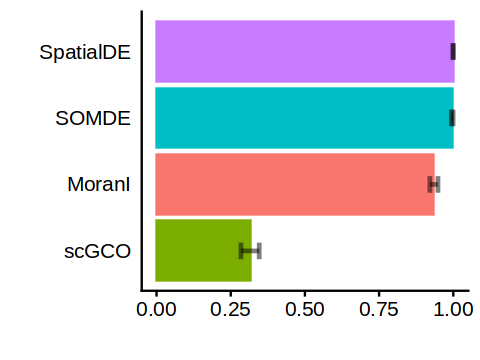

In [11]:
options(repr.plot.height = 3, repr.plot.width = 4)

p <- ggplot(data=df.plot, aes(x = reorder(method, mean), y = mean)) +
    geom_bar(aes(fill = method, color = method), stat = "identity") +
    geom_errorbar(aes(x=method, ymin=mean-sd, ymax=mean+sd), width=0.25, alpha=0.5, size=1) +
    xlab("") + ylab("") +
    theme_cowplot() +
    theme(legend.position = "none",
         axis.ticks.y = element_blank()) +
    coord_flip()

p

In [9]:
# options(repr.plot.height = 5, repr.plot.width = 5)

# p <- ggplot(data=df, aes(x = reorder(method, -accuracy, FUN = median), y = accuracy)) +
#     geom_boxplot(aes(color = method)) +
#     xlab("") + ylab("") +
#     theme_cowplot() +
#     theme(legend.position = "none",
#          axis.ticks.x = element_blank(),
#          axis.text.x = element_text(angle = 45, hjust = 1))

# p